Lab 11: Neural Networks
-----

## Prepare Training

In [1]:
import tensorflow as tf
import numpy as np
print(tf.__version__)

2.4.1


In [2]:
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images  = training_images / 255.0
test_images = test_images / 255.0

In [72]:
def train_mnist (batch_size, optimizer, model, epochs, verbose):

  if model == 'dense':
    model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                        tf.keras.layers.Dense(128, activation='relu'), 
                                        tf.keras.layers.Dense(10, activation='softmax')])
  if model == '1layerconv':
    model = tf.keras.models.Sequential([tf.keras.layers.Reshape((28,28,1), input_shape=(28,28)),
                                        tf.keras.layers.Conv2D(64, (3,3), activation = 'relu', input_shape = (28,28,1)),
                                        tf.keras.layers.MaxPooling2D(2,2),
                                        tf.keras.layers.Flatten(), 
                                        tf.keras.layers.Dense(128, activation='relu'), 
                                        tf.keras.layers.Dense(10, activation='softmax')])

  model.compile(optimizer = optimizer,
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
  
  history = model.fit(training_images, training_labels, batch_size = batch_size, epochs=epochs, verbose = verbose,validation_data=(test_images, test_labels))

  return history.history

## Training with different batch_size

In [13]:
results=[]
n_train=training_images.shape[0]

# training with batch_size = 1 might take about 15 minutes
# batch_sizes = [1, 16, 64, 128, n_train]

batch_sizes = [16, 64, 128, n_train]

for i in range(len(batch_sizes)):
  results.append(train_mnist(batch_sizes[i], optimizer='adam', model='dense', epochs=10, verbose = 1))

Epoch 1/10
60000/60000 [==============================] - 92s 2ms/step - loss: 0.6006 - accuracy: 0.7855 - val_loss: 0.5153 - val_accuracy: 0.8187
Epoch 2/10
60000/60000 [==============================] - 92s 2ms/step - loss: 0.4109 - accuracy: 0.8546 - val_loss: 0.4880 - val_accuracy: 0.8339
Epoch 3/10
60000/60000 [==============================] - 89s 1ms/step - loss: 0.3931 - accuracy: 0.8621 - val_loss: 0.4603 - val_accuracy: 0.8507
Epoch 4/10
60000/60000 [==============================] - 89s 1ms/step - loss: 0.3821 - accuracy: 0.8639 - val_loss: 0.4472 - val_accuracy: 0.8585
Epoch 5/10
60000/60000 [==============================] - 90s 1ms/step - loss: 0.3682 - accuracy: 0.8714 - val_loss: 0.4745 - val_accuracy: 0.8584
Epoch 6/10
60000/60000 [==============================] - 90s 1ms/step - loss: 0.3671 - accuracy: 0.8745 - val_loss: 0.4770 - val_accuracy: 0.8606
Epoch 7/10
60000/60000 [==============================] - 90s 1ms/step - loss: 0.3590 - accuracy: 0.8762 - val_loss: 0

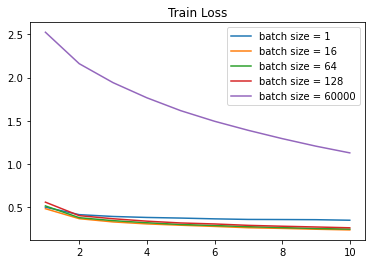

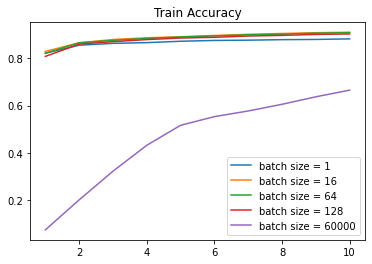

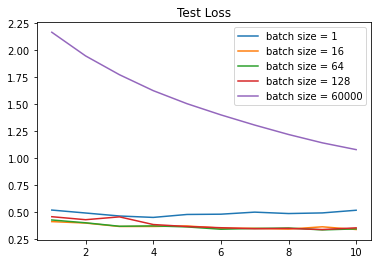

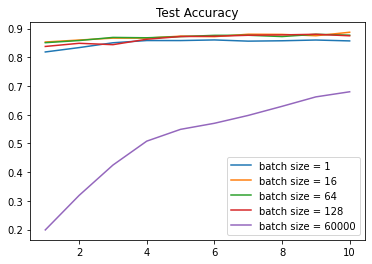

In [16]:
import matplotlib.pyplot as plt
num_epoch = len(results[0]['loss'])

plt.figure()
for i in range(len(batch_sizes)):
  plt.plot(np.linspace(1,num_epoch,num_epoch),results[i]['loss'], label='batch size = '+ str(batch_sizes[i]))
plt.title("Train Loss")
plt.legend()

plt.figure()
for i in range(len(batch_sizes)):
  plt.plot(np.linspace(1,num_epoch,num_epoch),results[i]['accuracy'], label='batch size = '+ str(batch_sizes[i]))
plt.title("Train Accuracy")
plt.legend()

plt.figure()
for i in range(len(batch_sizes)):
  plt.plot(np.linspace(1,num_epoch,num_epoch),results[i]['val_loss'], label='batch size = '+ str(batch_sizes[i]))
plt.title("Test Loss")
plt.legend()

plt.figure()
for i in range(len(batch_sizes)):
  plt.plot(np.linspace(1,num_epoch,num_epoch),results[i]['val_accuracy'], label='batch size = '+ str(batch_sizes[i]))
plt.title("Test Accuracy")
plt.legend()

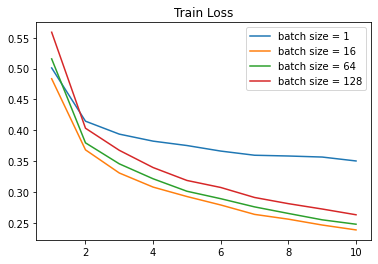

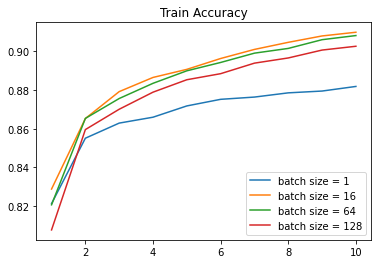

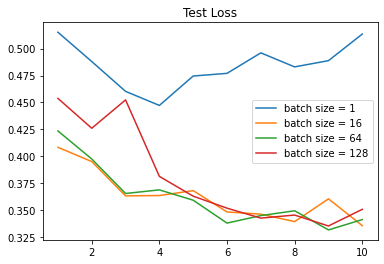

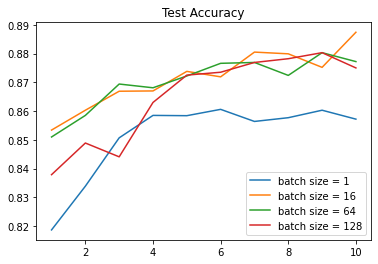

In [20]:
import matplotlib.pyplot as plt
num_epoch = len(results[0]['loss'])

plt.figure()
for i in range(len(batch_sizes)-1):
  plt.plot(np.linspace(1,num_epoch,num_epoch),results[i]['loss'], label='batch size = '+ str(batch_sizes[i]))
plt.title("Train Loss")
plt.legend()

plt.figure()
for i in range(len(batch_sizes)-1):
  plt.plot(np.linspace(1,num_epoch,num_epoch),results[i]['accuracy'], label='batch size = '+ str(batch_sizes[i]))
plt.title("Train Accuracy")
plt.legend()

plt.figure()
for i in range(len(batch_sizes)-1):
  plt.plot(np.linspace(1,num_epoch,num_epoch),results[i]['val_loss'], label='batch size = '+ str(batch_sizes[i]))
plt.title("Test Loss")
plt.legend()

plt.figure()
for i in range(len(batch_sizes)-1):
  plt.plot(np.linspace(1,num_epoch,num_epoch),results[i]['val_accuracy'], label='batch size = '+ str(batch_sizes[i]))
plt.title("Test Accuracy")
plt.legend()

## Training with different optimizer

In [18]:
results_optimizers=[]
n_train=training_images.shape[0]

optimizers = ['adam','sgd',"RMSprop"]

for i in range(len(optimizers)):
  results_optimizers.append(train_mnist(batch_size=16, optimizer=optimizers[i], model='dense', epochs=10, verbose = 1))


Epoch 1/10
3750/3750 [==============================] - 7s 2ms/step - loss: 0.6049 - accuracy: 0.7891 - val_loss: 0.4330 - val_accuracy: 0.8420
Epoch 2/10
3750/3750 [==============================] - 6s 2ms/step - loss: 0.3756 - accuracy: 0.8612 - val_loss: 0.3814 - val_accuracy: 0.8647
Epoch 3/10
3750/3750 [==============================] - 6s 2ms/step - loss: 0.3339 - accuracy: 0.8765 - val_loss: 0.4104 - val_accuracy: 0.8527
Epoch 4/10
3750/3750 [==============================] - 6s 2ms/step - loss: 0.3086 - accuracy: 0.8857 - val_loss: 0.3487 - val_accuracy: 0.8746
Epoch 5/10
3750/3750 [==============================] - 6s 2ms/step - loss: 0.2855 - accuracy: 0.8941 - val_loss: 0.3515 - val_accuracy: 0.8741
Epoch 6/10
3750/3750 [==============================] - 6s 2ms/step - loss: 0.2785 - accuracy: 0.8951 - val_loss: 0.3524 - val_accuracy: 0.8759
Epoch 7/10
3750/3750 [==============================] - 6s 2ms/step - loss: 0.2637 - accuracy: 0.9031 - val_loss: 0.3627 - val_accuracy:

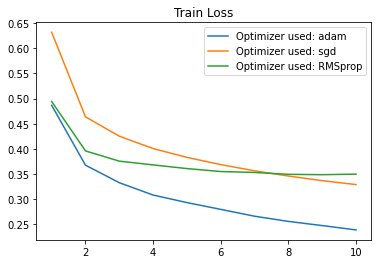

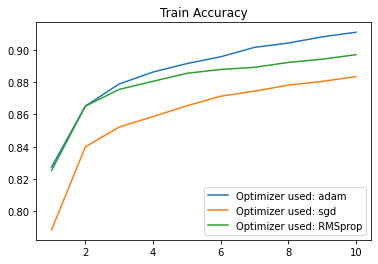

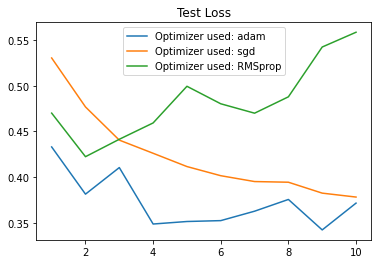

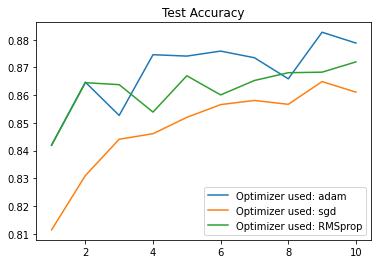

In [22]:
num_epoch = len(results_optimizers[0]['loss'])

plt.figure()
for i in range(len(optimizers)):
  plt.plot(np.linspace(1,num_epoch,num_epoch),results_optimizers[i]['loss'], label='Optimizer used: '+ str(optimizers[i]))
plt.title("Train Loss")
plt.legend()

plt.figure()
for i in range(len(optimizers)):
  plt.plot(np.linspace(1,num_epoch,num_epoch),results_optimizers[i]['accuracy'], label='Optimizer used: '+ str(optimizers[i]))
plt.title("Train Accuracy")
plt.legend()

plt.figure()
for i in range(len(optimizers)):
  plt.plot(np.linspace(1,num_epoch,num_epoch),results_optimizers[i]['val_loss'], label='Optimizer used: '+ str(optimizers[i]))
plt.title("Test Loss")
plt.legend()

plt.figure()
for i in range(len(optimizers)):
  plt.plot(np.linspace(1,num_epoch,num_epoch),results_optimizers[i]['val_accuracy'], label='Optimizer used: '+ str(optimizers[i]))
plt.title("Test Accuracy")
plt.legend()

## Training with different model architecture

In [73]:
results_models=[]
n_train=training_images.shape[0]

models = ['1layerconv','dense']

for i in range(len(models)):
  results_models.append(train_mnist(batch_size=16, optimizer='adam', model=models[i], epochs=10, verbose = 1))


Epoch 1/10
3750/3750 [==============================] - 72s 19ms/step - loss: 0.4727 - accuracy: 0.8323 - val_loss: 0.2943 - val_accuracy: 0.8918
Epoch 2/10
3750/3750 [==============================] - 71s 19ms/step - loss: 0.2464 - accuracy: 0.9103 - val_loss: 0.2749 - val_accuracy: 0.9009
Epoch 3/10
3750/3750 [==============================] - 71s 19ms/step - loss: 0.1910 - accuracy: 0.9299 - val_loss: 0.2511 - val_accuracy: 0.9086
Epoch 4/10
3750/3750 [==============================] - 70s 19ms/step - loss: 0.1522 - accuracy: 0.9430 - val_loss: 0.2527 - val_accuracy: 0.9147
Epoch 5/10
3750/3750 [==============================] - 71s 19ms/step - loss: 0.1280 - accuracy: 0.9526 - val_loss: 0.2648 - val_accuracy: 0.9143
Epoch 6/10
3750/3750 [==============================] - 71s 19ms/step - loss: 0.1025 - accuracy: 0.9629 - val_loss: 0.2869 - val_accuracy: 0.9104
Epoch 7/10
3750/3750 [==============================] - 71s 19ms/step - loss: 0.0818 - accuracy: 0.9698 - val_loss: 0.3365 -

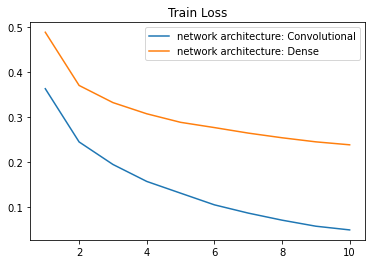

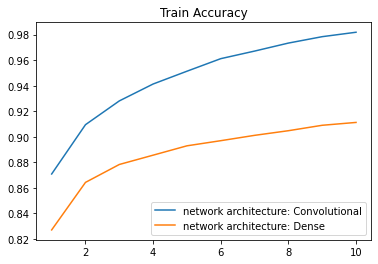

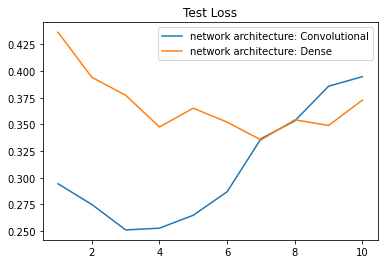

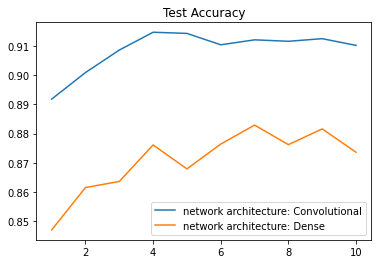

In [76]:
num_epoch = len(results_models[0]['loss'])

models_name = ['Convolutional', 'Dense']

plt.figure()
for i in range(len(models)):
  plt.plot(np.linspace(1,num_epoch,num_epoch),results_models[i]['loss'], label='network architecture: '+ str(models_name[i]))
plt.title("Train Loss")
plt.legend()

plt.figure()
for i in range(len(models)):
  plt.plot(np.linspace(1,num_epoch,num_epoch),results_models[i]['accuracy'], label='network architecture: '+ str(models_name[i]))
plt.title("Train Accuracy")
plt.legend()

plt.figure()
for i in range(len(models)):
  plt.plot(np.linspace(1,num_epoch,num_epoch),results_models[i]['val_loss'], label='network architecture: '+ str(models_name[i]))
plt.title("Test Loss")
plt.legend()

plt.figure()
for i in range(len(models)):
  plt.plot(np.linspace(1,num_epoch,num_epoch),results_models[i]['val_accuracy'], label='network architecture: '+ str(models_name[i]))
plt.title("Test Accuracy")
plt.legend()